In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME =  "University\ of\ Cyprus/MSc\ Artificial\ Intelligence/NLP-Project"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME/
!ls

Mounted at /content/drive
/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence/NLP-Project
cache							  lstm_model.py
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt	  Main.ipynb
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt.lock  main.py
cardiffnlp						  output
data							  positive_tweet.txt
DataAnalysis.ipynb					  preprocessing.py
DatasetsJoin.ipynb					  __pycache__
Finetune.ipynb						  slangdict.pickle
finetune.py						  wandb
GPT-2.ipynb


In [2]:
!pip install ekphrasis  -U
!pip  install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00


In [3]:
from preprocessing import *
#from finetune import *

import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...


Reading twitter - 1grams ...
profit - taking hits nikkei nt <url> <url> rt <user>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
tweets_df = read_data("data/tweets_company.csv")

In [5]:
df_summary(tweets_df)

Data Shape (4280526, 9)
# of NAs:  Unnamed: 0       0
tweet_id         0
writer           0
post_date        0
body             0
comment_num      0
retweet_num      0
like_num         0
ticker_symbol    0
dtype: int64


In [6]:
tweets_df.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [7]:
tweets_df['ticker_symbol'] = tweets_df['ticker_symbol'].map(lambda q: 'GOOGL' if q=='GOOG' else q)

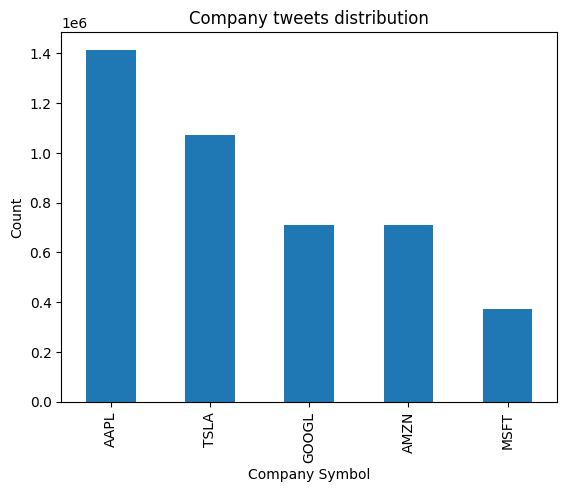

In [8]:
import matplotlib.pyplot as plt

# Plot a bar plot of the 'age' column
tweets_df['ticker_symbol'].value_counts().plot.bar()

# Add title and labels
plt.title('Company tweets distribution')
plt.xlabel('Company Symbol')
plt.ylabel('Count')

# Show the plot
plt.show()

In [9]:
apple_tweets_df = tweets_df[tweets_df['ticker_symbol'] =='TSLA']  # change to AAPL
google__tweets_df = tweets_df[tweets_df['ticker_symbol'] =='GOOGL']
tesla_tweets_df = tweets_df[tweets_df['ticker_symbol'] =='TSLA']


#apple_tweets_df = pd.concat([apple_tweets_df, google__tweets_df])


In [10]:
apple_tweets_df['ticker_symbol'].value_counts()

TSLA    1073202
Name: ticker_symbol, dtype: int64

In [11]:
values_df = pd.read_csv("data/company_values/CompanyValues.csv")

In [12]:
values_df = values_df.sort_values("day_date")

In [13]:
values_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
13894,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
8685,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


In [14]:
values_df["day_date"].unique()

array(['2010-06-01', '2010-06-02', '2010-06-03', ..., '2020-05-27',
       '2020-05-28', '2020-05-29'], dtype=object)

In [15]:
apple_tweets_df.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
3,3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
5,5,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
7,7,550443808606126081,aaplstocknews,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
9,9,550443809700851716,iknowfirst,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
11,11,550443857142611968,Cprediction,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA


In [16]:
apple_values_df = values_df[values_df['ticker_symbol']=='TSLA']
google_values_df = values_df[values_df['ticker_symbol']=='GOOGL']

#apple_values_df = pd.concat([apple_values_df, google_values_df])



In [17]:
apple_values_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
16959,TSLA,2010-06-29,23.89,18751150,19.00,25.0000,17.54
16958,TSLA,2010-06-30,23.83,17165210,25.79,30.4192,23.30
16957,TSLA,2010-07-01,21.96,8216789,25.00,25.9200,20.27
16956,TSLA,2010-07-02,19.20,5135795,23.00,23.1000,18.71
16955,TSLA,2010-07-06,16.11,6858092,20.00,20.0000,15.83


<h2> Sentiment Analysis - Vader </h2>

In [18]:
import  re, string, nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
import itertools, re

from collections import Counter

In [20]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from ekphrasis.dicts.emoticons import emoticons as emoticons_dictionary

sid = SentimentIntensityAnalyzer()

def count_emoticons(tweet):
    terms = [word.lower() for word in tweet.split(" ")]
    return len([w for w in terms if w in emoticons_dictionary.keys()])

# def calculate_sentiment(text):           return TextBlob(text).sentiment.polarity
# def calculate_subjectivity(text):        return TextBlob(text).sentiment.subjectivity

def calculate_sentiment_intensity(text): 

  scores = sid.polarity_scores(text)
  
  return [scores["neg"],  scores["neu"], scores["pos"]]

In [21]:
apple_tweets_df = preprocess_whole(apple_tweets_df)
apple_tweets_df.head()

/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence/NLP-Project/preprocessing.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_body'] = df['body'].map(lambda q: tokenize(q))
/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence/NLP-Project/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_body'] = df['processed_body'].map(lambda q: uncontract(q))
/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,processed_body
3,3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,gm tsla volkswagen push record recall tally hi...
5,5,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,swing trading percent return day swing trading...
7,7,550443808606126081,aaplstocknews,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,swing trading percent return day swing trading...
9,9,550443809700851716,iknowfirst,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,swing trading percent return day swing trading...
11,11,550443857142611968,Cprediction,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,swing trading percent return day swing trading...


In [22]:
apple_tweets_df.shape

(1073202, 10)

<h2> Sentiment Analysis - Transfomers </h2>

In [23]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from transformers import TextClassificationPipeline
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

<h2> Sentiment Inference </h2>

In [25]:
task='sentiment-financial/checkpoint-128'
#task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [26]:
# Preprocess text (username and link placeholders)
def preprocess_tweet(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [27]:

model =  AutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

text = "The company showcased losses in the last quarter"
text = preprocess_tweet(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.9306358 , 0.06358143, 0.0057828 ], dtype=float32)

In [28]:
# text = "The company showcased increase in revenues in the last quarter"
text = "The results for the financial statement of the company has released"

text = preprocess_tweet(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00584447, 0.9747224 , 0.01943324], dtype=float32)

In [29]:
np.argmax(scores)

1

In [30]:
from transformers import pipeline

classifier = TextClassificationPipeline( model=model, tokenizer=tokenizer, return_all_scores= True, device=0, max_length=512, truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [31]:
classifier(text)[0][0]['score']

0.005844478495419025

In [32]:
labels_map = {0:"negative", 1:"neutral", 2:"positive"}

<h1> This how we get the probabilities </h1>




---


In [33]:
def predict_sentiment_probs(encoded_input):
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores
    
def negative_prob(text):
    return classifier(text)[0][0]['score']#scores[0]

def neutral_prob(text):
    return classifier(text)[0][1]['score'] #scores[1]

def positive_prob(text):
    return classifier(text)[0][2]['score'] #scores[2]

def tokenized(text):
    text = preprocess_tweet(text)
    encoded_input = tokenizer(text, return_tensors='pt', )
    return encoded_input

In [34]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [35]:
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [36]:
#apple_tweets_df['tokenized'] = apple_tweets_df['body'].map(lambda x: tokenized(x))

In [37]:
mask = (apple_tweets_df['post_date'] >= "2018-01-01") & (apple_tweets_df['post_date'] <= "2018-06-01")

apple_tweets_df_sampled = apple_tweets_df.loc[mask]
apple_tweets_df_sampled.shape

(83126, 10)

<h1> This where we iterate the dataset for the inference </h1>

---



In [38]:
# apple_tweets_df_sampled['negative'] = apple_tweets_df_sampled['tokenized'].map(lambda x: negative_prob(x))
# apple_tweets_df_sampled['neutral'] = apple_tweets_df_sampled['tokenized'].map(lambda x: neutral_prob(x))
# apple_tweets_df_sampled['positive'] = apple_tweets_df_sampled['tokenized'].map(lambda x: positive_prob(x))

apple_tweets_df_sampled['vader_negative'] = apple_tweets_df_sampled['processed_body'].map(lambda x: calculate_sentiment_intensity(x)[0])
apple_tweets_df_sampled['vader_neutral'] = apple_tweets_df_sampled['processed_body'].map(lambda x: calculate_sentiment_intensity(x)[1])
apple_tweets_df_sampled['vader_positive'] = apple_tweets_df_sampled['processed_body'].map(lambda x: calculate_sentiment_intensity(x)[2])

apple_tweets_df_sampled['negative'] = apple_tweets_df_sampled['body'].map(lambda x: negative_prob(x))
apple_tweets_df_sampled['neutral'] = apple_tweets_df_sampled['body'].map(lambda x: neutral_prob(x))
apple_tweets_df_sampled['positive'] = apple_tweets_df_sampled['body'].map(lambda x: positive_prob(x))


<ipython-input-38-5cd46119b73e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_tweets_df_sampled['vader_negative'] = apple_tweets_df_sampled['processed_body'].map(lambda x: calculate_sentiment_intensity(x)[0])
<ipython-input-38-5cd46119b73e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_tweets_df_sampled['vader_neutral'] = apple_tweets_df_sampled['processed_body'].map(lambda x: calculate_sentiment_intensity(x)[1])
<ipython-input-38-5cd46119b73e>:7: SettingWithCopyWarning: 
A value is trying

In [39]:
apple_tweets_df_sampled.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,processed_body,vader_negative,vader_neutral,vader_positive,negative,neutral,positive
2488977,2516897,947622745310945280,rfmulcahy,2018-01-01,My short average is 348...price is at 311...th...,0,0,1,TSLA,short average price thanks playing tsla,0.000,0.460,0.540,0.488668,0.137723,0.373608
2488981,2516902,947624142504955904,talesftf,2018-01-01,That fully autonomous CA to NYC $TSLA drive (g...,1,0,6,TSLA,fully autonomous ca nyc allcaps tsla drive gar...,0.000,0.745,0.255,0.088562,0.034835,0.876602
2488983,2516904,947624680084656130,OptionAlarm,2018-01-01,"With past performance like this, how can you n...",0,0,0,TSLA,past performance like not sign free day trial ...,0.120,0.619,0.261,0.095004,0.037812,0.867184
2488987,2516908,947626260284493824,talesftf,2018-01-01,"Damn, who’s tracking all those $TSLA executive...",0,0,0,TSLA,damn ’ tracking tsla executive departure blast...,0.265,0.490,0.245,0.360301,0.127858,0.511841
2488991,2516912,947627544957931521,talesftf,2018-01-01,2025? More like 2018-2025. ~2020 lots of long-...,1,0,1,TSLA,like lot long range ev hit market kw charging ...,0.000,0.815,0.185,0.226191,0.189715,0.584094


In [40]:
 # Grouping - Later to do multi-aggregation(count, mean, sum, custom)
# sentiment_df =sentiment_df.groupby(["source.ip","timestamp"]).sum().groupby([pd.Grouper(level='source.ip'),
#                                                             pd.Grouper(level='timestamp', freq='2S')])['source.bytes'].agg(['sum', 'mean', 'count'])
        

In [41]:
sentiment_df = apple_tweets_df_sampled[['post_date', 'negative','neutral','positive', 'vader_negative','vader_neutral', 'vader_positive']]
sentiment_df.head()

,post_date,negative,neutral,positive,vader_negative,vader_neutral,vader_positive
2488977,2018-01-01,0.488668,0.137723,0.373608,0.000,0.460,0.540
2488981,2018-01-01,0.088562,0.034835,0.876602,0.000,0.745,0.255
2488983,2018-01-01,0.095004,0.037812,0.867184,0.120,0.619,0.261
2488987,2018-01-01,0.360301,0.127858,0.511841,0.265,0.490,0.245
2488991,2018-01-01,0.226191,0.189715,0.584094,0.000,0.815,0.185


In [42]:
#sentiment_day_df =sentiment_df.groupby(["post_date"]).sum() 

# set the date column as the index of the dataframe

# group the dataframe by week and sum the values for each week
sentiment_df['post_date'] = pd.to_datetime(sentiment_df['post_date'])
#apple_values_df['post_date'] = pd.to_datetime(apple_values_df['post_date'])

sentiment_day_df = sentiment_df.set_index('post_date').resample('W').mean()
sentiment_day_df

<ipython-input-42-8ab7d37ba410>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['post_date'] = pd.to_datetime(sentiment_df['post_date'])


,negative,neutral,positive,vader_negative,vader_neutral,vader_positive
post_date,,,,,,
2018-01-07,0.379218,0.128851,0.491931,0.073064,0.795276,0.131663
2018-01-14,0.314413,0.125052,0.560536,0.059072,0.801314,0.139618
2018-01-21,0.326793,0.132919,0.540288,0.060402,0.812974,0.126615
2018-01-28,0.374240,0.141004,0.484756,0.073557,0.798164,0.128274
2018-02-04,0.343550,0.136146,0.520304,0.063996,0.801810,0.134190
2018-02-11,0.400345,0.137566,0.462089,0.077650,0.791129,0.131219
2018-02-18,0.364163,0.137195,0.498643,0.068682,0.796904,0.134411
2018-02-25,0.385190,0.144716,0.470093,0.069559,0.812443,0.117994
2018-03-04,0.382565,0.157583,0.459851,0.063458,0.823617,0.112918


In [43]:
apple_values_df['ticker_symbol'].value_counts()

TSLA    3065
Name: ticker_symbol, dtype: int64

In [44]:
mask = (apple_values_df['day_date'] >= "2018-01-01") & (apple_values_df['day_date'] <= "2018-06-01")


apple_values_sampled_df= apple_values_df.loc[mask]

print(apple_values_sampled_df.head())

apple_values_sampled_df = apple_values_sampled_df.rename(columns={"day_date":"post_date"})
apple_values_sampled_df.head()
#apple_values_sampled_df = apple_values_sampled_df.drop(apple_values_sampled_df.columns[7], axis=1)

      ticker_symbol    day_date  close_value   volume  open_value  high_value  \
17301          TSLA  2018-01-01       311.35  3769504      316.18    316.4100   
15068          TSLA  2018-01-02       320.53  4345615      312.00    322.1099   
15067          TSLA  2018-01-03       317.25  4438520      321.00    325.2500   
15066          TSLA  2018-01-04       314.62  9944593      312.87    318.5500   
15065          TSLA  2018-01-05       316.58  4588728      316.62    317.2400   

       low_value  
17301     310.00  
15068     311.00  
15067     315.55  
15066     305.68  
15065     312.00  


,ticker_symbol,post_date,close_value,volume,open_value,high_value,low_value
17301,TSLA,2018-01-01,311.35,3769504,316.18,316.4100,310.00
15068,TSLA,2018-01-02,320.53,4345615,312.00,322.1099,311.00
15067,TSLA,2018-01-03,317.25,4438520,321.00,325.2500,315.55
15066,TSLA,2018-01-04,314.62,9944593,312.87,318.5500,305.68
15065,TSLA,2018-01-05,316.58,4588728,316.62,317.2400,312.00


In [45]:
sentiment_day_df.reset_index(inplace=True)
sentiment_day_df.head()

,post_date,negative,neutral,positive,vader_negative,vader_neutral,vader_positive
0,2018-01-07,0.379218,0.128851,0.491931,0.073064,0.795276,0.131663
1,2018-01-14,0.314413,0.125052,0.560536,0.059072,0.801314,0.139618
2,2018-01-21,0.326793,0.132919,0.540288,0.060402,0.812974,0.126615
3,2018-01-28,0.374240,0.141004,0.484756,0.073557,0.798164,0.128274
4,2018-02-04,0.343550,0.136146,0.520304,0.063996,0.801810,0.134190


In [46]:
apple_values_sampled_df['post_date'] = pd.to_datetime(apple_values_sampled_df['post_date'],  format='%Y/%m/%d',errors='coerce')

In [47]:
apple_values_sampled_df['post_date']

17301   2018-01-01
15068   2018-01-02
15067   2018-01-03
15066   2018-01-04
15065   2018-01-05
           ...    
17347   2018-05-28
14967   2018-05-29
14966   2018-05-30
14965   2018-05-31
14964   2018-06-01
Name: post_date, Length: 152, dtype: datetime64[ns]

In [48]:
apple_values_sampled_df = apple_values_sampled_df.set_index('post_date').resample('W').mean()
apple_values_sampled_df.reset_index(inplace=True)



joined_apple_df = sentiment_day_df.merge(apple_values_sampled_df, how='outer')
joined_apple_df.head()

<ipython-input-48-bf7e9a9861fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  apple_values_sampled_df = apple_values_sampled_df.set_index('post_date').resample('W').mean()


,post_date,negative,neutral,positive,vader_negative,vader_neutral,vader_positive,close_value,volume,open_value,high_value,low_value
0,2018-01-07,0.379218,0.128851,0.491931,0.073064,0.795276,0.131663,316.212857,5.180631e+06,315.987143,319.148557,311.175714
1,2018-01-14,0.314413,0.125052,0.560536,0.059072,0.801314,0.139618,335.930000,6.054083e+06,333.498571,339.837114,329.596429
2,2018-01-21,0.326793,0.132919,0.540288,0.060402,0.812974,0.126615,345.438571,5.519638e+06,342.472857,348.354243,339.965714
3,2018-01-28,0.374240,0.141004,0.484756,0.073557,0.798164,0.128274,345.204286,5.322338e+06,348.107143,350.611429,341.035714
4,2018-02-04,0.343550,0.136146,0.520304,0.063996,0.801810,0.134190,347.165714,4.417739e+06,346.974286,352.974286,342.257143


In [49]:
'''
Calculate the differnce in value instead
'''
joined_apple_df['low_value']= joined_apple_df['low_value'].diff()
joined_apple_df.head()


,post_date,negative,neutral,positive,vader_negative,vader_neutral,vader_positive,close_value,volume,open_value,high_value,low_value
0,2018-01-07,0.379218,0.128851,0.491931,0.073064,0.795276,0.131663,316.212857,5.180631e+06,315.987143,319.148557,NaN
1,2018-01-14,0.314413,0.125052,0.560536,0.059072,0.801314,0.139618,335.930000,6.054083e+06,333.498571,339.837114,18.420714
2,2018-01-21,0.326793,0.132919,0.540288,0.060402,0.812974,0.126615,345.438571,5.519638e+06,342.472857,348.354243,10.369286
3,2018-01-28,0.374240,0.141004,0.484756,0.073557,0.798164,0.128274,345.204286,5.322338e+06,348.107143,350.611429,1.070000
4,2018-02-04,0.343550,0.136146,0.520304,0.063996,0.801810,0.134190,347.165714,4.417739e+06,346.974286,352.974286,1.221429


In [50]:
joined_apple_df = joined_apple_df.dropna()
joined_apple_df.head()


,post_date,negative,neutral,positive,vader_negative,vader_neutral,vader_positive,close_value,volume,open_value,high_value,low_value
1,2018-01-14,0.314413,0.125052,0.560536,0.059072,0.801314,0.139618,335.930000,6.054083e+06,333.498571,339.837114,18.420714
2,2018-01-21,0.326793,0.132919,0.540288,0.060402,0.812974,0.126615,345.438571,5.519638e+06,342.472857,348.354243,10.369286
3,2018-01-28,0.374240,0.141004,0.484756,0.073557,0.798164,0.128274,345.204286,5.322338e+06,348.107143,350.611429,1.070000
4,2018-02-04,0.343550,0.136146,0.520304,0.063996,0.801810,0.134190,347.165714,4.417739e+06,346.974286,352.974286,1.221429
5,2018-02-11,0.400345,0.137566,0.462089,0.077650,0.791129,0.131219,322.655714,9.331513e+06,329.324286,334.037643,-29.251429


In [51]:
#joined_apple_df.tail(40)

In [52]:
apple_values_sampled_df.head()

,post_date,close_value,volume,open_value,high_value,low_value
0,2018-01-07,316.212857,5.180631e+06,315.987143,319.148557,311.175714
1,2018-01-14,335.930000,6.054083e+06,333.498571,339.837114,329.596429
2,2018-01-21,345.438571,5.519638e+06,342.472857,348.354243,339.965714
3,2018-01-28,345.204286,5.322338e+06,348.107143,350.611429,341.035714
4,2018-02-04,347.165714,4.417739e+06,346.974286,352.974286,342.257143


In [93]:
# joined_apple_df['negative'] = joined_apple_df['negative'].map(lambda q:  q**(1/3))
# joined_apple_df['positive'] = joined_apple_df['positive'].map(lambda q:  q**(1/3))
joined_apple_df = joined_apple_df[['positive', 'neutral', 'negative','vader_positive',  'vader_neutral', 'vader_negative', 'close_value']]

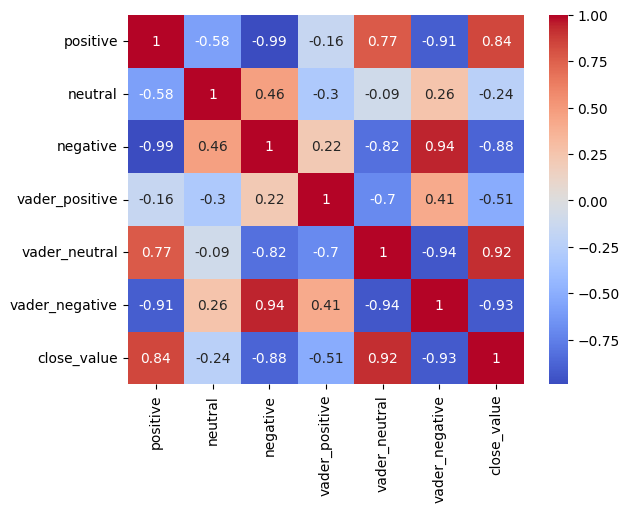

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = joined_apple_df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [55]:
# Pearson's Correlation test
from scipy.stats import pearsonr

values = joined_apple_df['close_value']
pos =   joined_apple_df['positive']

stat, p = pearsonr(values, pos)

print('The Peason Coefficinet is: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

The Peason Coefficinet is: stat=0.842, p=0.000
Probably dependent


In [90]:
#the Pearson's Correlation test
from scipy.stats import pearsonr

values = joined_apple_df['close_value']
pos =   joined_apple_df['negative']

stat, p = pearsonr(values, pos)

print('The Peason Coefficient of th is: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

The Peason Coefficient of th is: stat=-0.876, p=0.000
Probably dependent


In [91]:
#the Pearson's Correlation test
from scipy.stats import pearsonr

values = joined_apple_df['close_value']
pos =   joined_apple_df['vader_negative']

stat, p = pearsonr(values, pos)

print('The Peason Coefficinet is: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

The Peason Coefficinet is: stat=-0.925, p=0.000
Probably dependent


In [92]:
#the Pearson's Correlation test
from scipy.stats import pearsonr

values = joined_apple_df['close_value']
pos =   joined_apple_df['vader_positive']

stat, p = pearsonr(values, pos)

print('The Peason Coefficinet is: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

The Peason Coefficinet is: stat=-0.511, p=0.018
Probably dependent


In [60]:
df_to_plot = joined_apple_df[['positive','low_value']]

value_top = df_to_plot['low_value'].max()
value_low = df_to_plot['low_value'].min()
value_pos_top = df_to_plot['positive'].max()
value_pos_low = df_to_plot['positive'].min()

df_to_plot['low_value'] = df_to_plot['low_value'].map(lambda q: ((q-value_low)/ (value_top -value_low)))
df_to_plot['positive'] = df_to_plot['positive'].map(lambda q: ((q-value_pos_low)/ (value_pos_top -value_pos_low)))

df_to_plot.head()

<ipython-input-60-c26ae1b27273>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['low_value'] = df_to_plot['low_value'].map(lambda q: ((q-value_low)/ (value_top -value_low)))
<ipython-input-60-c26ae1b27273>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['positive'] = df_to_plot['positive'].map(lambda q: ((q-value_pos_low)/ (value_pos_top -value_pos_low)))


,positive,low_value
1,1.000000,0.979603
2,0.903931,0.857891
3,0.640444,0.717315
4,0.809109,0.719605
5,0.532893,0.258951


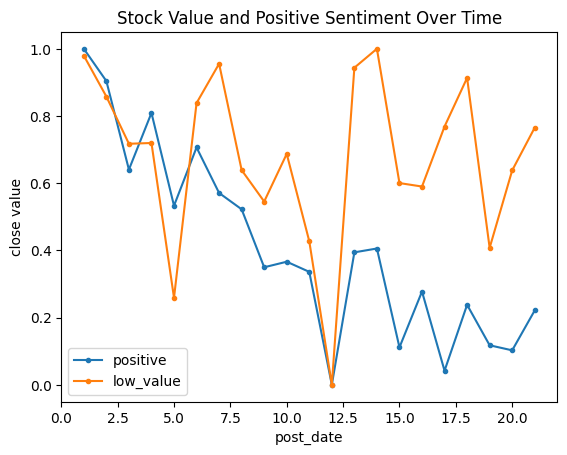

In [61]:
df_to_plot.plot(title='Stock Value and Positive Sentiment Over Time', xlabel='post_date', ylabel='close value', style='.-')
plt.show()

In [62]:
df_to_plot = joined_apple_df[['negative','low_value']]

value_top = df_to_plot['low_value'].max()
value_low = df_to_plot['low_value'].min()
value_pos_top = df_to_plot['negative'].max()
value_pos_low = df_to_plot['negative'].min()

df_to_plot['low_value'] = df_to_plot['low_value'].map(lambda q: ((q-value_low)/ (value_top -value_low)))
df_to_plot['negative'] = df_to_plot['negative'].map(lambda q: ((q-value_pos_low)/ (value_pos_top -value_pos_low)))

df_to_plot.head()

<ipython-input-62-18f199dc921c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['low_value'] = df_to_plot['low_value'].map(lambda q: ((q-value_low)/ (value_top -value_low)))
<ipython-input-62-18f199dc921c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['negative'] = df_to_plot['negative'].map(lambda q: ((q-value_pos_low)/ (value_pos_top -value_pos_low)))


,negative,low_value
1,0.000000,0.979603
2,0.062055,0.857891
3,0.299876,0.717315
4,0.146050,0.719605
5,0.430727,0.258951


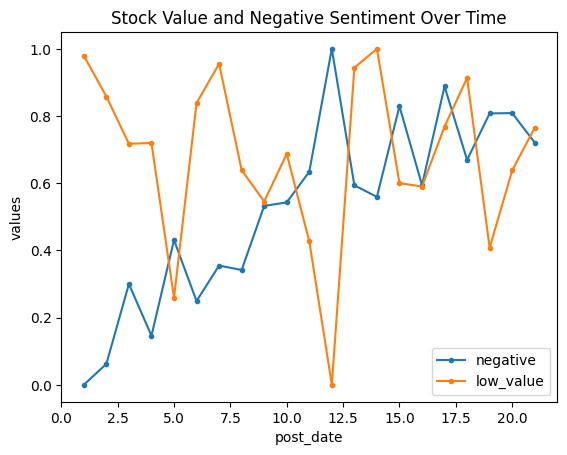

In [63]:
df_to_plot.plot(title='Stock Value and Negative Sentiment Over Time', xlabel='post_date', ylabel='values', style='.-')
plt.show()

<h2> Modelling </h2> 

In [77]:
joined_apple_df.head()
df_to_model = joined_apple_df[['positive','negative','close_value']]
df_simple =  joined_apple_df[['close_value']]

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

training_percentage=0.67

EarlyStopper = EarlyStopping(patience=3, monitor='loss', mode='min')


In [79]:
look_back = 4 # time_window( per week)

In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle



def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/'+ name + '.pkl', 'rb') as f:  #'obj/'
        return pickle.load(f)

def time_window_preprocessing(dataset, q, look_back=1,):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset[i + look_back, :])
  
	return np.array(dataX), np.array(dataY)

def preprocessing(dataset, q):
  dataset_X = dataset.values
  scaler_X = MinMaxScaler(feature_range=(0, 1))
  dataset_X = scaler_X.fit_transform(dataset_X)  
  
 
  dataset_X, dataset_Y = time_window_preprocessing(dataset_X, q,  look_back=look_back)
  print(dataset_X[:5])
  print(dataset_Y[:5])
 
  train_size = int(len(dataset_X) * training_percentage)  
  trainX, testX = dataset_X[0:train_size,:], dataset_X[train_size:len(dataset_X)+1,:]
  trainY, testY = dataset_Y[0:train_size,0], dataset_Y[train_size:len(dataset_X)+1,0]  


  scaler_Y = scaler_X

  # save_obj(scaler_X, "scalerX")
  # save_obj(scaler_Y, "scalerY")

  return trainX, trainY, testX, testY, scaler_X

In [163]:
X_train, y_train, X_test,y_test, scaler = preprocessing(df_simple,0)

[[[0.85004766]
  [0.97694948]
  [0.97382269]
  [1.        ]]

 [[0.97694948]
  [0.97382269]
  [1.        ]
  [0.67288847]]

 [[0.97382269]
  [1.        ]
  [0.67288847]
  [0.75610105]]

 [[1.        ]
  [0.67288847]
  [0.75610105]
  [0.95370829]]

 [[0.67288847]
  [0.75610105]
  [0.95370829]
  [0.91916111]]]
[[0.67288847]
 [0.75610105]
 [0.95370829]
 [0.91916111]
 [0.76034318]]


In [164]:
X_train[0].shape

(4, 1)

In [165]:
# Define the LSTM model

def lstm_model():
  model = Sequential([
      LSTM(64, input_shape=(look_back,1), return_sequences=True),
      LSTM(32),
      Dense(1)
    ])
  
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [166]:
univariate_model = lstm_model()


In [167]:
history_uni = univariate_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.3887
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3591
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3306
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3029
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2760
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2499
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2247
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2003
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1769
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1549
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1344
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1159
Epoch 13/50
1/1 [==============================] - 0s 9ms/step - lo

In [168]:
X_train, y_train, X_test,y_test, scaler = preprocessing(df_to_model,2)

[[[1.         0.         0.85004766]
  [0.90393136 0.06205482 0.97694948]
  [0.64044352 0.29987633 0.97382269]
  [0.809109   0.14604974 1.        ]]

 [[0.90393136 0.06205482 0.97694948]
  [0.64044352 0.29987633 0.97382269]
  [0.809109   0.14604974 1.        ]
  [0.5328927  0.4307269  0.67288847]]

 [[0.64044352 0.29987633 0.97382269]
  [0.809109   0.14604974 1.        ]
  [0.5328927  0.4307269  0.67288847]
  [0.70633358 0.2493652  0.75610105]]

 [[0.809109   0.14604974 1.        ]
  [0.5328927  0.4307269  0.67288847]
  [0.70633358 0.2493652  0.75610105]
  [0.57087262 0.35476427 0.95370829]]

 [[0.5328927  0.4307269  0.67288847]
  [0.70633358 0.2493652  0.75610105]
  [0.57087262 0.35476427 0.95370829]
  [0.52227651 0.34160707 0.91916111]]]
[[0.5328927  0.4307269  0.67288847]
 [0.70633358 0.2493652  0.75610105]
 [0.57087262 0.35476427 0.95370829]
 [0.52227651 0.34160707 0.91916111]
 [0.34974273 0.53234153 0.76034318]]


In [169]:
# Define the LSTM model

def multivariate_lstm_model():
  model = Sequential([
      LSTM(64, input_shape=(look_back,3), return_sequences=True),
      LSTM(32),
      Dense(1)
    ])
  
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [170]:
multivariate_model = multivariate_lstm_model()

In [171]:
history_multi = multivariate_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.1811
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1568
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1340
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1128
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0934
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0760
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0609
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0483
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0385
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 13/50
1/1 [==============================] - 0s 9ms/step - loss: 0

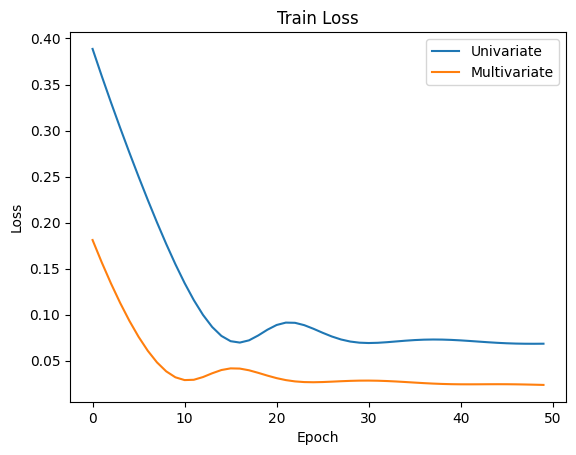

In [174]:
# Visualize the validation loss
plt.plot(history_uni.history['loss'], label="Univariate")
plt.plot(history_multi.history['loss'], label='Multivariate')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()